# **CSI 4142: Assignment 1** </br> Exploratory Data Analysis

## **Group members**
| Name | Student ID |
|------|------------|
| Zixin Fan | 300296371 |
| Solin Maaroof | 300250903 | 

## **Libraries**

In [2]:
import pandas as pd # For data manipulation and analysis using DataFrames
import numpy as np # For numberical computing and array/ matrix operations
import matplotlib.pyplot as plt # For creating basic plots and visualizations
import seaborn as sns # For statistical data visualization with better styling

## **Dataset 1**: Mobile Device Usage and User Behavior

### Goal and Target Audience
The goal of this analysis is to understand mobile users' behavior pattern in terms of device usage, application usage, and system preferences. Through data-driven analysis, we aim to provide insights that can help smartphone manufacturers, product managers, and marketing teams better identify their target customer segments and optimize device features for different user groups.

### Description
- **Dataset Name:** Mobile Device Usage and User Behavior Dataset
- **Author:** Seyedvala Khorasani
- **Purpose:** This dataset was created to analyze mobile device usage patterns and classify user behavior based on daily smartphone activities. </br> It is mainly designed for data analysis and machine learning experiments related to mobile usage and user engagement.
- **Shape:** This dataset contains 700 rows and 11 columns, as shown by dataset1.shape.
- **Features:**
  - User ID (Categorical): Unique identifier for each user.
  - Device Model (Categorical): Model of the user's smartphone.
  - Operating System (Categorical): The OS of the device (iOS or Android).
  - App Usage Time (Numerical): Daily time spent on mobile applications, measured in minutes.
  - Screen On Time (Numerical): Average hours per day the screen is active.
  - Battery Drain (Numerical): Daily battery consumption in mAh.
  - Number of Apps Installed (Numerical): Total apps available on the device.
  - Data Usage (Numerical): Daily mobile data consumption in megabytes.
  - Age (Numerical): Age of the user.
  - Gender (Categorical): Gender of the user (Male or Female).
  - User Behavior Class (Categorical): Classification of user behavior based on usage patterns (1 to 5).

No missing values were detected, based on the results of dataset1.isnull().sum(). </br>
Some features may be correlated, such as app usage time, screen on time, and battery drain, which may introduce redundancy in the dataset.

### Shape and Missing Values

In [3]:
dataset1 = pd.read_csv( "https://raw.githubusercontent.com/Zixin-Fan/CSI4142-A1/main/user_behavior_dataset.csv") # Read the dataset1 from a row github url
dataset1.head() # show the first 5 rows of the dataset

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [4]:
dataset1.shape # show the number of rows and the number of columns

(700, 11)

In [5]:
dataset1.isnull().sum() # count missing values per column

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

### Analysis and Insights

#### r1: Visualization of the distribution of app usage time

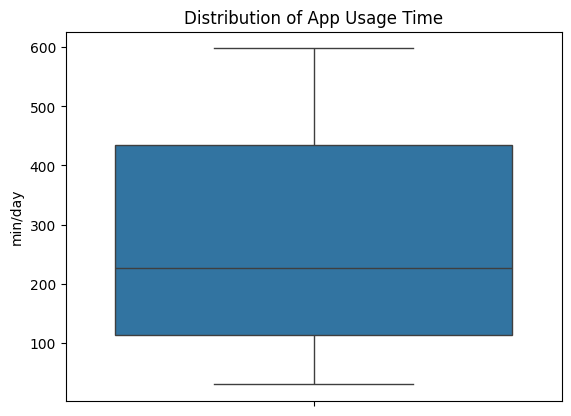

In [6]:
plt.figure() # create a new figure
sns.boxplot(y = dataset1["App Usage Time (min/day)"]) # draw a boxplot to visualize the distribution
plt.title("Distribution of App Usage Time") # set the title of the boxplot
plt.ylabel("min/day") # label the x axis to indicate the unit
plt.show() # display the boxplot

In [7]:
dataset1["App Usage Time (min/day)"].describe()

count    700.000000
mean     271.128571
std      177.199484
min       30.000000
25%      113.250000
50%      227.500000
75%      434.250000
max      598.000000
Name: App Usage Time (min/day), dtype: float64

##### Insight 1
The boxplot shows that the median app usage time is 227.5 min/day. The minimum usage is 30 min/day, while the maximum reaches 598 min/day. The mean usage time is 271 min/day, which is slightly higher than the median, indicating a right-skewed distribution.

#### r2: Countplot for "Operating System"

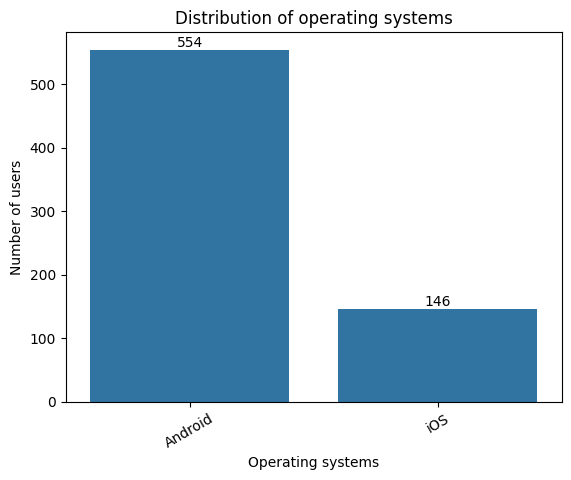

In [8]:
plt.figure()
countplot = sns.countplot(x = dataset1["Operating System"]) # create the countplot to show the number of users for each operating system
plt.title("Distribution of operating systems")
plt.xlabel("Operating systems")
plt.ylabel("Number of users")
for container in countplot.containers:
    countplot.bar_label(container) # add value labels on top of each bar
plt.xticks(rotation = 30) # rotate x-axis labels for readability
plt.show()

##### Insight 2
The countplot shows a strong imbalance between Android and iOS users. Android has 554 users, while iOS has 146 users. This means that the number of Android users is approximately four times that of iOS users. This imbalance should be considered when interpreting the results.

#### r3: Grouped-age countplot showing device preference by age group

In [9]:
dataset1["Age"].describe() # check the quantiles to detremine appropriate age group boundaries

count    700.000000
mean      38.482857
std       12.012916
min       18.000000
25%       28.000000
50%       38.000000
75%       49.000000
max       59.000000
Name: Age, dtype: float64

In [10]:
dataset1["Device Model"].value_counts() # # Check how many different device models are present to decide whether to keep all categories or only the top ones

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

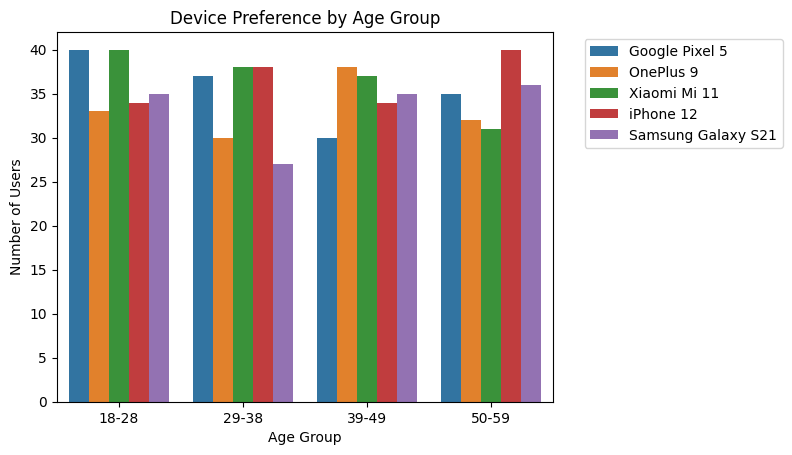

In [11]:
# group ages
age_bins = [18, 28, 38, 49, 59] # cut points of each bins
age_labels = ["18-28", "29-38", "39-49", "50-59"] # age group labels
dataset1["Age Group"] = pd.cut( # create age groups using predefined bins
    dataset1["Age"], # the category we need to group
    bins = age_bins,
    labels = age_labels,
    include_lowest = True # include the lower bound
)

# visualize device preference across age groups
plt.figure()
sns.countplot(
    x = dataset1["Age Group"],
    hue = dataset1["Device Model"] # further divide each age group by device model for comparison
)
plt.title("Device Preference by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left") # move the legend to the top right corner to avoid overlapping with the data
plt.show()

##### Insight 3
The grouped countplot shows that different device models are most popular among different age groups. Google Pixel 5 and Xiaomi Mi 11 have the highest number of users in the 18–28 age group. OnePlus 9 is most popular among users aged 39–49, while iPhone 12 has the highest number of users in the 50–59 group. For Samsung Galaxy S21 users, the 29-38 age group has the lowest count, while the other three age groups show similar usage levels. Overall, the chart indicates that different age groups are associated with different dominant device models, suggesting variations in usage patterns across age ranges.

#### r4: Comparison of screen time distributions by gender

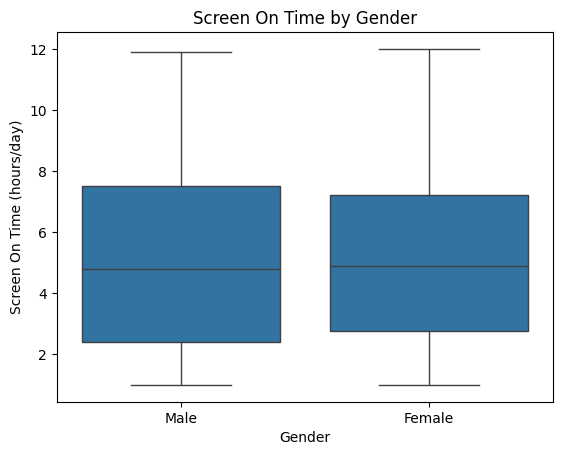

In [12]:
plt.figure()
sns.boxplot(
    x = dataset1["Gender"],
    y = dataset1["Screen On Time (hours/day)"]
)
plt.title("Screen On Time by Gender")
plt.show()

##### Insight 4
The boxplot shows that male and female users have very similar median screen-on times. However, female users have a slightly smaller interquartile range, indicating a more concentrated distribution. In contrast, male users show a wider range, with a lower minimum and a higher maximum screen-on time. This suggests that male users exhibit greater variability in screen usage.


#### r5: Heatmap of gender and operating system usage

In [13]:
dataset1["Gender"].value_counts()

Gender
Male      364
Female    336
Name: count, dtype: int64

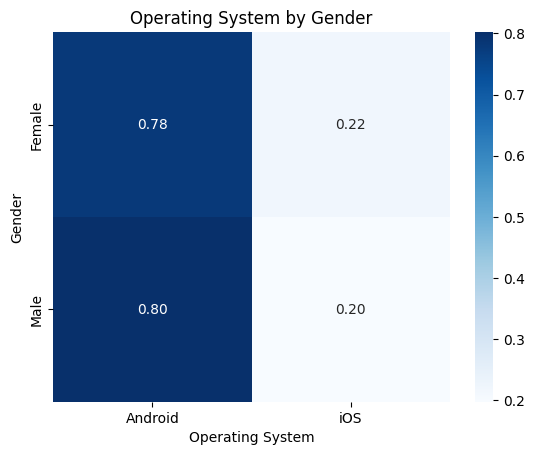

In [14]:
plt.figure()
crosstab = pd.crosstab(dataset1["Gender"],dataset1["Operating System"],normalize="index") # show proportions within each gender
sns.heatmap(crosstab, annot=True, fmt=".2f",cmap="Blues") # draw a heatmap with annotated cell values(Integer) and blue color mapping
plt.title("Operating System by Gender")
plt.show()

##### Insight 5
Although there are slightly more male users than female users in the dataset, the normalized heatmap shows that both genders have a similar preference pattern. Android dominates for both males and females. However, females have a slightly higher proportion of iOS users compared to males, indicating a relatively stronger preference for iOS among female users.

#### r6: Analysis of user behaviors based on gender

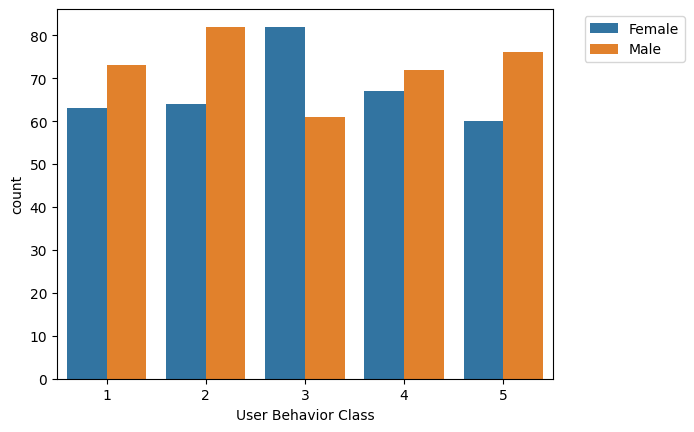

In [15]:
behavior_order = [1,2,3,4,5] # define the logical order of user behavior classes (from low to high)
plt.figure()
sns.countplot(
    x = dataset1["User Behavior Class"],
    hue = dataset1["Gender"],
    order = behavior_order
)
plt.legend(bbox_to_anchor=(1.05,1),loc = "upper left")
plt.show()

##### Insight 6
The distribution of user behavior classes differs between genders. Female users are most concentrated in Class 3, which represents the central category among the five classes. The counts in other classes are relatively balanced, indicating a more centralized distribution. In contrast, male users show higher counts in both lower and higher behavior classes, such as Class 2 and Class 5, while having fewer users in Class 3. This suggests a more dispersed distribution across categories. Overall, female users tend to cluster around the middle behavior class, whereas male users are more distributed toward both lower and higher behavior classes.

#### r7: Analysis of the number of apps installed by user behavior classes

In [16]:
dataset1["Number of Apps Installed"].describe() # display basic statistics of app numbers

count    700.000000
mean      50.681429
std       26.943324
min       10.000000
25%       26.000000
50%       49.000000
75%       74.000000
max       99.000000
Name: Number of Apps Installed, dtype: float64

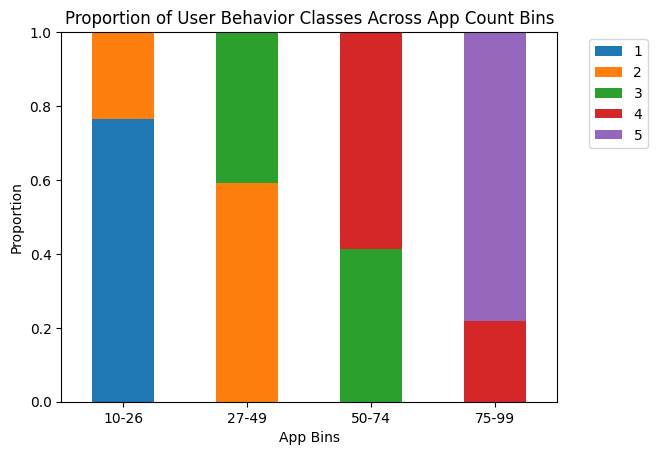

In [17]:
# define bins
app_bins = [10, 26, 49, 74, 99] # create bins based on quartiles and data range
app_labels = ["10-26","27-49","50-74","75-99"] # define labels for each app count range
dataset1["App Bins"] = pd.cut( # group users into app count ranges using defined bins
    dataset1["Number of Apps Installed"],
    bins = app_bins,
    labels = app_labels,
    include_lowest= True
)

# visualize proportions using a stacked bar chart
crosstab = pd.crosstab( # create a normalized cross-tabulation to show proportions in each bin
    dataset1["App Bins"],
    dataset1["User Behavior Class"],
    normalize="index" 
)
crosstab.plot(kind="bar", stacked=True) # plot a stacked bar chart to show user behavior class proportions
plt.title("Proportion of User Behavior Classes Across App Count Bins")
plt.ylabel("Proportion")
plt.legend(bbox_to_anchor = (1.05,1), loc = "upper left")
plt.xticks(rotation = 0)
plt.show()

##### Insight 7
The stacked bar chart shows a clear relationship between the number of apps installed and user behavior classes. Users in lower app bins (10-26) are mainly classified into lower behavior levels (Class 1-2), while users in higher bins (75-99) are dominated by higher behavior levels (Class 4-5). This strong alignment suggests that user behavior classes are likely derived from usage-related features such as app count, leading to a highly structured distribution. Therefore, the observed pattern reflects the underlying data design rather than independent behavioral differences.


#### r8: Relationship between battery drain and data usage

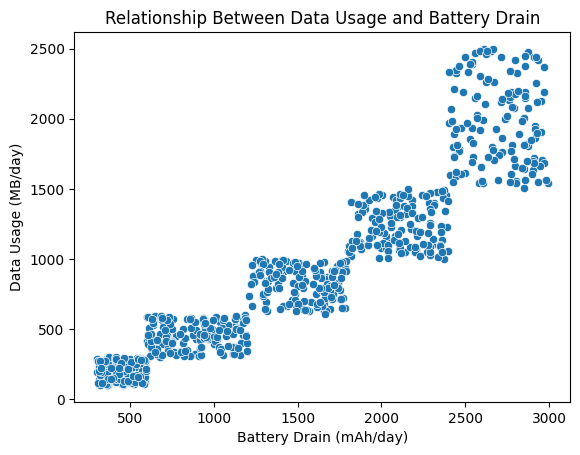

In [18]:
plt.figure()
sns.scatterplot(
    x = dataset1["Battery Drain (mAh/day)"],
    y = dataset1["Data Usage (MB/day)"]
)
plt.title("Relationship Between Data Usage and Battery Drain")
plt.xlabel("Battery Drain (mAh/day)")
plt.ylabel("Data Usage (MB/day)")
plt.show()

##### Insight 8
While data usage and battery drain are strongly correlated, users with battery drain above 2500 mAh/day exhibit much greater variability in data consumption. In contrast, low-usage users display more concentrated and stable patterns. This suggests that battery consumption becomes increasingly unpredictable as data usage rises, reflecting more diverse usage behaviors among heavy users.

#### Category/Numerical: Average screen on Time by operating system

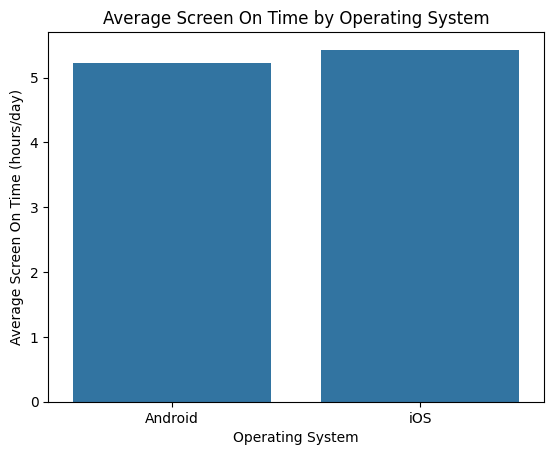

In [19]:
avg_screen_time = dataset1.groupby("Operating System")["Screen On Time (hours/day)"].mean() # Calculate the average screen-on time for each operating system
plt.figure()
sns.barplot(
    x=avg_screen_time.index,
    y=avg_screen_time.values
)
plt.title("Average Screen On Time by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Average Screen On Time (hours/day)")
plt.xticks(rotation = 0)
plt.show()

##### Insight 9
Although Android users account for a larger proportion of the dataset, iOS users show a slightly higher average screen-on time. This suggests that iOS users tend to be more actively engaged with their devices, spending more time on their screens per day on average.

#### Numerical/Numerical: Relationship screen on time and between data usage

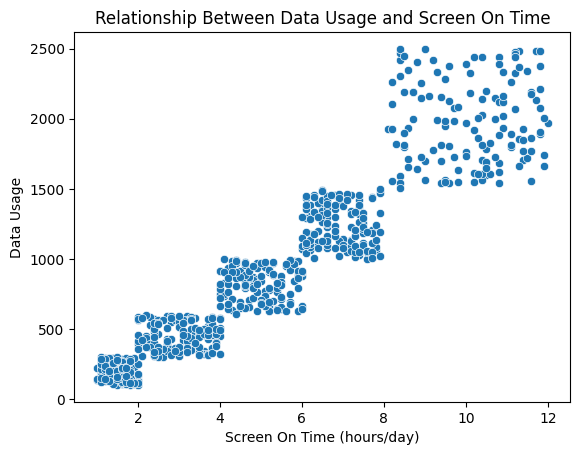

In [20]:
plt.figure()
sns.scatterplot(
    x=dataset1["Screen On Time (hours/day)"],
    y=dataset1["Data Usage (MB/day)"]
)
plt.title("Relationship Between Data Usage and Screen On Time")
plt.xlabel("Screen On Time (hours/day)")
plt.ylabel("Data Usage")
plt.show()

##### Insight 10
The scatterplot shows a strong positive correlation between screen on time and data usage. When screen time exceeds 8 hours per day, data usage becomes more dispersed, indicating more diverse usage behaviors among heavy users.

### Conclusion
- This exploratory data analysis provides a comprehensive overview of mobile users’ behavior, including application usage, device preference, operating system choice, and engagement patterns.
- Android users account for a much larger proportion of the dataset, while iOS users tend to have slightly higher average screen-on time, suggesting stronger engagement among iOS users.
- Age and gender are associated with differences in device preferences and usage patterns. Different age groups favor different device models, reflecting generational differences in hardware preferences. While male and female users show similar median screen-on times, male users exhibit greater variability. Gender-based analyses also indicate similar overall operating system preferences, with a slightly higher proportion of iOS users among females.
- User behavior classes are closely related to application installation patterns. Users with fewer installed apps tend to belong to lower behavior classes, whereas users with more apps are more likely to fall into higher behavior classes. This strong alignment suggests that behavioral classifications are largely influenced by usage-related features.
- In addition, data usage and battery consumption are strongly correlated, with heavier users showing greater variability in consumption patterns. When screen-on time increases substantially, data usage also becomes more dispersed, indicating more diverse usage behaviors among highly active users.
- Overall, these findings provide valuable insights for smartphone manufacturers, product managers, and marketing teams to better understand user segments and optimize device features for different user groups. However, the dataset shows an imbalance between Android and iOS users and reflects certain structural characteristics, which may limit the generalizability of the results.

## **Dataset 2**: Adult Census Income

### Goal and Target Audience


The goal of this analysis is to examine the relationships between demographic, educational, and employment-related variables and income level in the Adult Census Income dataset. Through exploratory data analysis, we highlight key patterns and differences between individuals earning more than $50K per year and those earning $50K or less. This report is intended for policy analysts, social science researchers, and data scientists interested in understanding income distribution and workforce characteristics.

### Description
- **Dataset name**: Adult Census Income
- **Author**: UCI Machine Learning Repository (UCIML)
- **Purpose**: Predict whether income exceeds $50K/yr based on census data
- **Shape**: This dataset contains 32561 rows and 15 columns
- **Features**:
  - <u>age</u>: years (numerical)
  - <u>workclass</u>: employment type (categorical)
  - <u>fnlwgt</u>: final sampling weight (numerical)
  - <u>education</u>: highest education level (categorical)
  - <u>education-num</u>: years of education (numerical)
  - <u>marital-status</u>: marital status (categorical)
  - <u>occupation</u>: occupation type (categorical)
  - <u>relationship</u>: family relationship (categorical)
  - <u>race</u>: race (categorical)
  - <u>sex</u>: biological sex (categorical)
  - <u>capital-gain</u>: capital gains (numerical)
  - <u>capital-loss</u>: capital losses (numerical)
  - <u>hours-per-week</u>: weekly working hours (numerical)
  - <u>native-country</u>: country of origin (categorical)
  - <u>income</u>: target label (categorical, <=50K or >50K)
  
Missing values appear as "?" in the raw file (handled as NaN). </br> 
Some variables are related (e.g., education and education-num).

### Shape and Missing Values

In [4]:
dataset2_url = "https://raw.githubusercontent.com/solinm/csi4142-a1/refs/heads/main/adult.csv"
dataset2 = pd.read_csv(dataset2_url, na_values="?")

dataset2.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
dataset2.shape # N of rows + N of columns

(32561, 15)

In [6]:
dataset2.isna().sum() # N of missing values

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [7]:
# clean missing values ("?" is treated as NaN)
dataset2 = dataset2.dropna().reset_index(drop=True)
dataset2.shape # N of rows AFTER dropping columns with missing values

(30162, 15)

### Analysis and Insights

#### r1 - Univariate Numerical

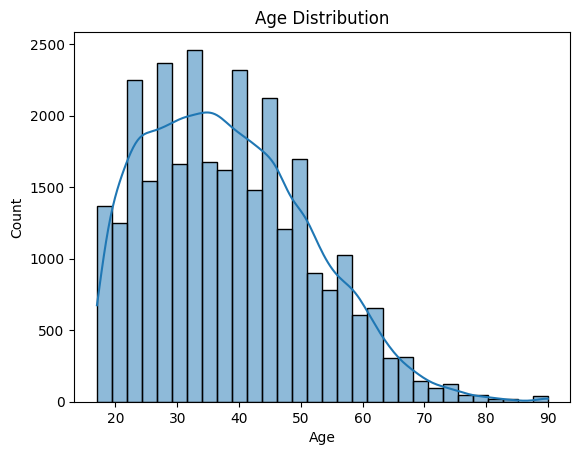

In [8]:
plt.figure()

sns.histplot(data=dataset2, x="age", bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

##### **Insight 1** (r1 - Univariate Numerical)
The age distribution is right-skewed: most individuals cluster between roughly the mid-20s and mid-40s, while a long tail extends into older ages (60+), indicating fewer but present older individuals.

#### r2 - Univariate Categorical

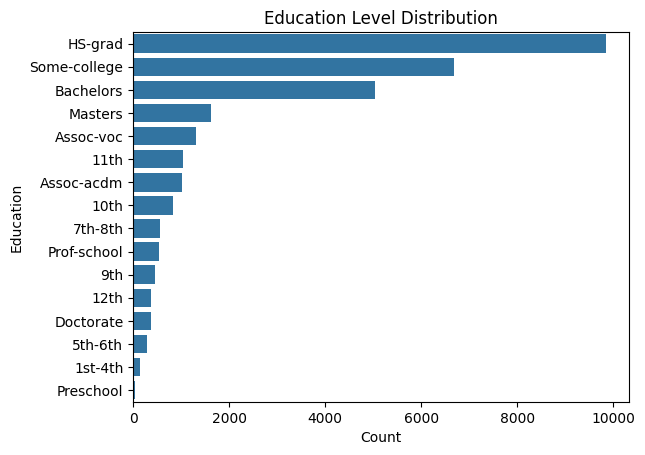

In [9]:
plt.figure()

sns.countplot(data=dataset2, y="education", order=dataset2["education"].value_counts().index)
plt.title("Education Level Distribution")
plt.xlabel("Count")
plt.ylabel("Education")

plt.show()

##### **Insight 2** (r2 - Univariate Categorical)
The countplot shows that most individuals have either a high school diploma (HS-grad) or some college education (Some-college), while higher degrees are much less common.

#### r3 - Grouped Categorical Countplot

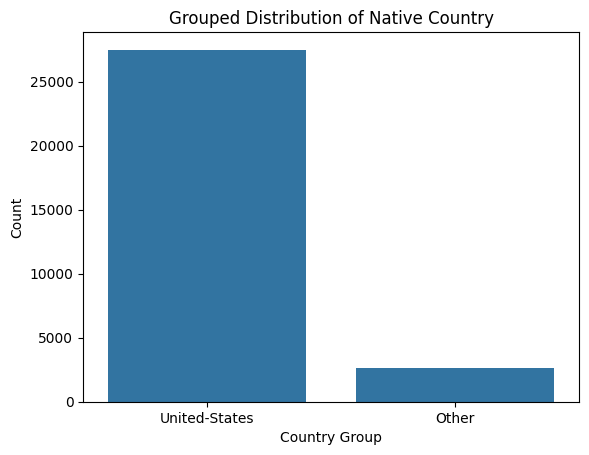

In [ ]:
country_group = np.where(dataset2["native.country"] == "United-States", "United-States", "Other")
dataset2["country_group"] = country_group

plt.figure()

sns.countplot(data=dataset2, x="country_group")
plt.title("Grouped Distribution of Native Country")
plt.xlabel("Country Group")
plt.ylabel("Count")

plt.show()

##### **Insight 3** (r3 - Grouped Categorical Countplot)
By grouping native countries into two categories (“United States” and “Other”), we observe that most individuals in the dataset are from the United States.

#### r4 - Numerical by Categorical

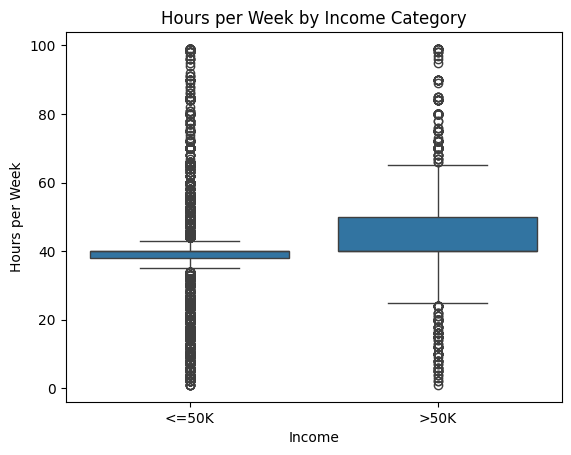

In [ ]:
plt.figure()

sns.boxplot(x=dataset2["income"], y=dataset2["hours.per.week"])
plt.title("Hours per Week by Income Category")
plt.xlabel("Income")
plt.ylabel("Hours per Week")

plt.show()

##### **Insight 4** (r4 - Numerical by Categorical)
According to the boxplot, individuals earning more than $50K tend to work more hours per week, exhibiting both a higher median and greater variability compared to those earning $50K or less.

#### r5 - Categorical vs Categorical (2 values)

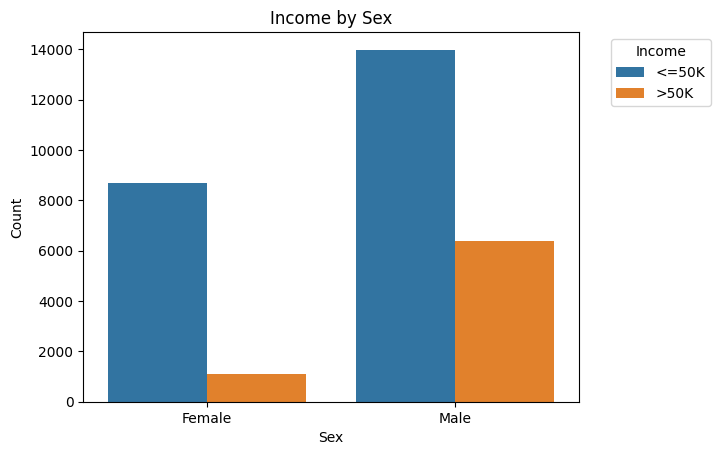

In [ ]:
plt.figure()

sns.countplot(data=dataset2, x="sex", hue="income")
plt.title("Income by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Income", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

##### **Insight 5** (r5 - Categorical vs Categorical (2 values))
Based on the countplot, individuals earning more than $50K are substantially more represented among males than females in the dataset.

#### r6 - Categorical vs Categorical (>2, ordered)

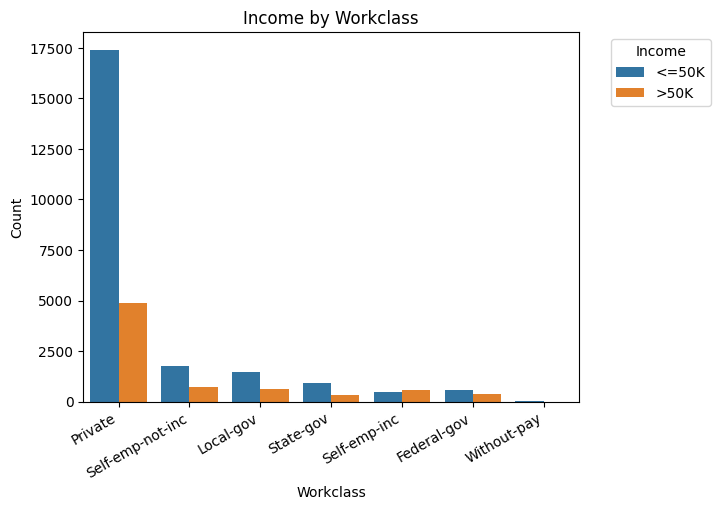

In [ ]:
workclass_order = dataset2["workclass"].value_counts().index

plt.figure()

sns.countplot(data=dataset2, x="workclass", hue="income", order=workclass_order)
plt.title("Income by Workclass")
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Income", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

##### **Insight 6** (r6 - Categorical vs Categorical (>2, ordered))
The Private workclass dominates both income categories, but it also contains the largest number of individuals earning more than $50K compared to other workclasses.

#### r7 - Categorical Across Numeric Bins

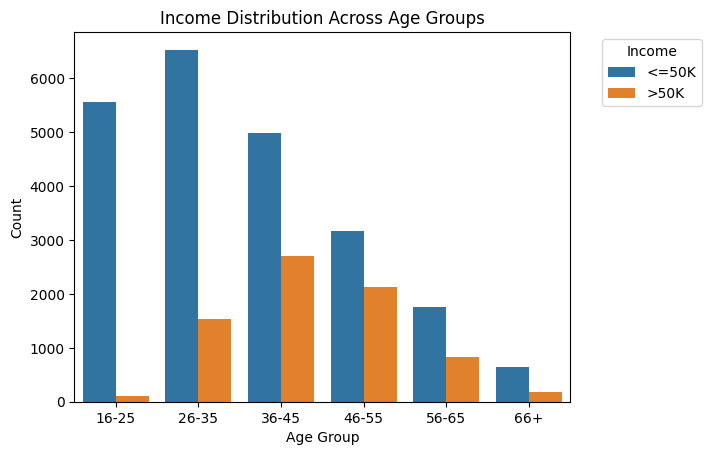

In [ ]:
age_bins = [16, 25, 35, 45, 55, 65, 90]
age_labels = ["16-25", "26-35", "36-45", "46-55", "56-65", "66+"]
dataset2["age_group"] = pd.cut(dataset2["age"], bins=age_bins, labels=age_labels, include_lowest=True)

plt.figure()

sns.countplot(data=dataset2, x="age_group", hue="income")
plt.title("Income Distribution Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Income", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

##### **Insight 7** (r7 - Categorical Across Numeric Bins)
According to the countplot, higher-income (>50K) individuals are most concentrated in the 36–55 age range, with fewer high earners among the youngest and oldest age groups.

#### r8 - Numerical vs Numerical

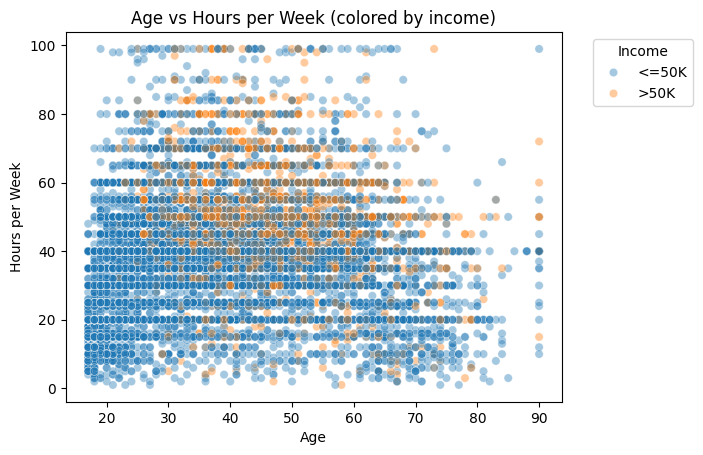

In [ ]:
plt.figure()

sns.scatterplot(
    data=dataset2,
    x="age",
    y="hours.per.week",
    hue="income",
    alpha=0.4
)
plt.title("Age vs Hours per Week (colored by income)")
plt.xlabel("Age")
plt.ylabel("Hours per Week")
plt.legend(title="Income", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

##### **Insight 8** (r8 - Numerical vs Numerical)
According to this scatterplot, there is no strong linear relationship between age and hours worked per week, although individuals earning more than $50K tend to cluster at higher weekly hours across a wide range of ages.

#### r4 - Numerical by Categorical

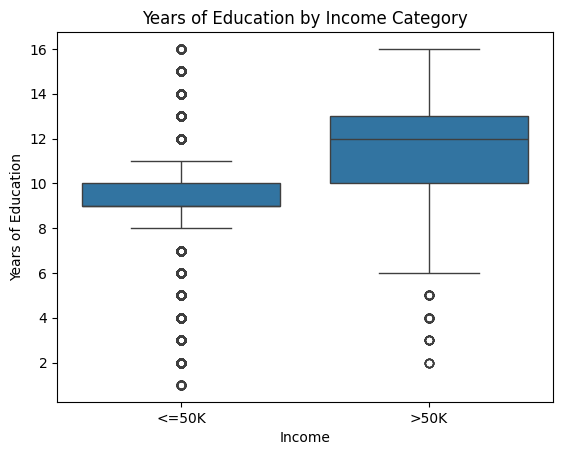

In [ ]:
plt.figure()

sns.boxplot(x=dataset2["income"], y=dataset2["education.num"])
plt.title("Years of Education by Income Category")
plt.xlabel("Income")
plt.ylabel("Years of Education")

plt.show()

##### **Insight 9** (r4 - Numerical by Categorical)

The boxplot shows that individuals earning more than $50K have a higher median number of years of education and a wider interquartile range (IQR) compared to those earning $50K or less.

#### r6 - Categorical vs Categorical (>2, ordered)

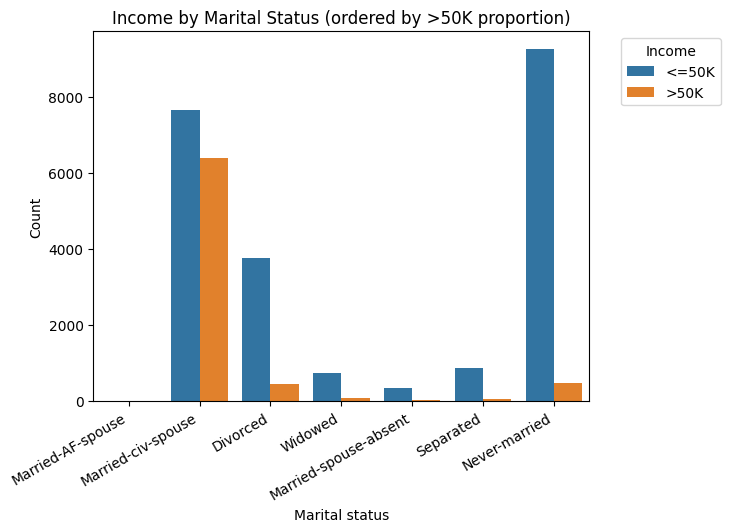

In [11]:
marital_order = (
    pd.crosstab(dataset2["marital.status"], dataset2["income"], normalize="index")
    [">50K"]
    .sort_values(ascending=False)
    .index
)

plt.figure()

sns.countplot(
    data=dataset2,
    x="marital.status",
    hue="income",
    order=marital_order
)

plt.title("Income by Marital Status (ordered by >50K proportion)")
plt.xlabel("Marital status")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Income", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

##### **Insight 10** (r6 - Categorical vs Categorical (>2, ordered))

When marital status categories are ordered by the proportion of individuals earning more than $50K, legally married individuals show the highest representation of high-income earners, while those who have never been married or who are separated are predominantly concentrated in the $50K-or-less income group.

### Conclusion
- The analysis reveals consistent differences between the >$50K and <=$50K groups across education, work intensity, and demographic characteristics.
- Higher-income individuals generally show stronger indicators of educational attainment and labor engagement, while lower-income observations are more concentrated in lower education and fewer work hours.
- Age, sex, and marital status display noticeable shifts in the distribution of high earners, suggesting these demographic factors align with income differences.
- Categorical features are unevenly distributed, so some observed patterns reflect base-rate effects rather than unique relationships.
- The dataset includes structural considerations (e.g., dominant categories, removed missing values, and overlapping features) that should be kept in mind when interpreting results.

## **References**
Some code snippets and explanations were generated with the assistance of ChatGPT (OpenAI), based on queries related to exploratory data analysis and data visualization.

Queries included:
- "How to generate boxplots and histograms in Python"
- "How to generate heatmaps in Python"
- "How to create a stacked bar chart"
- " How to create scatterplot"
- "How to move the legends"
- "How to rotate the labels"
- "How to improve the wording and clarity of insight sentences"
- “How to best label variables in visualization plots”
- "Bin size selection for histograms"
- "Example target audience for adult census income dataset"

Official documentation:
- https://pandas.pydata.org/docs/
- https://matplotlib.org/stable/tutorials/index
- https://seaborn.pydata.org/tutorial.html